In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn
import Plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame
# %matplotlib notebook
plt.style.use('ggplot')

Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#TEST USING QUANTILE REGRESSION ON EB/EE DATA SEPARATELY AND UNIFIED AFTERWARDS, WITH AND WITHOUT WEIGHTS
#---------------------------------------------------------------------


In [3]:
# Variable you want to correct
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi",'CovarianceIetaIphi']#, "SigmaRR", 'PhoIso03', 'ChIso03', 'ChIso03worst']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [4]:
# Upload Dataframes- mc have already a fake run period
qr_mc1= quantileRegression("mc")
qr_mc2= quantileRegression("mc")
qr_data= quantileRegression("data")
qr_mc1.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5", 0, -1)
qr_mc2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5", 0, -1)
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Final.h5", 0, -1)
dfdata= qr_data.getDF() 

Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5
Selecting events   [ 0 ,  9554789 ]  out of  9554789
number of events: 9554789
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5
Selecting events   [ 0 ,  9554789 ]  out of  9554789
number of events: 9554789
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Final.h5
Selecting events   [ 0 ,  21216525 ]  out of  21216525
number of events: 21216525


In [5]:
qr_mc1.correctAll(X, ylist, quantiles,EBEE="EB", relativePath= "weights_Period_") 
qr_mc2.correctAll(X, ylist, quantiles,EBEE="EE", relativePath= "weights_Period_") 

Loading corrected targets from :  correctedTargetsweights_Period_1_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_2_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_3_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_4_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_5_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_1_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_2_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_3_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_4_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_5_EE.h5


In [6]:
#in order to compare the different runperios we need to correct for the PileUP
#divide data frames to apply weights.
frame = [qr_mc1.getDF() , qr_mc2.getDF() ]
dfmc = pd.concat(frame).reset_index(drop=True) 
dfdata1   = dfdata  .query('runperiod==1').reset_index()  
dfdata2   = dfdata  .query('runperiod==2').reset_index()  
dfdata3   = dfdata  .query('runperiod==3').reset_index()  
dfdata4   = dfdata  .query('runperiod==4').reset_index()  
dfdata5   = dfdata  .query('runperiod==5').reset_index() 
dfmc1   = dfmc  .query('runperiod==1').reset_index(drop=True)  
dfmc2   = dfmc  .query('runperiod==2').reset_index(drop=True)  
dfmc3   = dfmc  .query('runperiod==3').reset_index(drop=True)  
dfmc4   = dfmc  .query('runperiod==4').reset_index(drop=True)  
dfmc5   = dfmc  .query('runperiod==5').reset_index(drop=True)

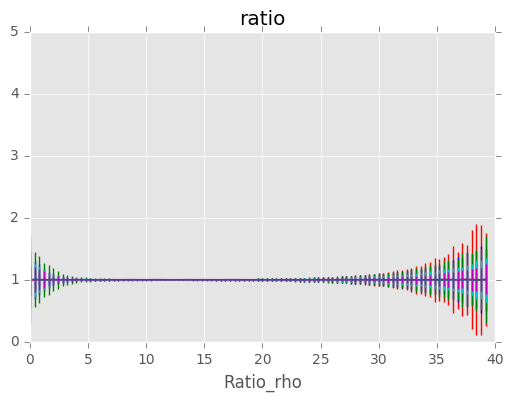

In [7]:
rv=np.arange(0,40,0.4)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Ratio_rho")

#Do the Ratio wrt the last 
plot.plotHistRatio(dfmc1.loc[:,"rho"],dfdata1.loc[:,"rho"],rv, Color="r",Weight1=dfmc1["weight"])
plot.plotHistRatio(dfmc2.loc[:,"rho"],dfdata2.loc[:,"rho"],rv, Color="b",Weight1=dfmc2["weight"])
plot.plotHistRatio(dfmc3.loc[:,"rho"],dfdata3.loc[:,"rho"],rv, Color="g",Weight1=dfmc3["weight"])
plot.plotHistRatio(dfmc4.loc[:,"rho"],dfdata4.loc[:,"rho"],rv, Color="c",Weight1=dfmc4["weight"])
plot.plotHistRatio(dfmc5.loc[:,"rho"],dfdata5.loc[:,"rho"],rv, Color="m",Weight1=dfmc5["weight"])
ax.set_ylim([0,5])

ax.set_title('ratio')

In [8]:
#get the ratio of the histograms
ratiodata1,edge,ratiodataErr= plot.getHistRatio(dfdata5.loc[:,"rho"],dfdata1.loc[:,"rho"],rv)
ratiodata2,edge,ratiodataErrE= plot.getHistRatio(dfdata5.loc[:,"rho"],dfdata2.loc[:,"rho"],rv)
ratiodata3,edge,ratiodataErrF= plot.getHistRatio(dfdata5.loc[:,"rho"],dfdata3.loc[:,"rho"],rv)
ratiodata4,edge,ratiodataErrG= plot.getHistRatio(dfdata5.loc[:,"rho"],dfdata4.loc[:,"rho"],rv)
ratiomc1,edge,ratiodataErrG= plot.getHistRatio(dfdata5.loc[:,"rho"],dfmc1.loc[:,"rho"],rv,Weight2=dfmc1["weight"])
ratiomc2,edge,ratiodataErrG= plot.getHistRatio(dfdata5.loc[:,"rho"],dfmc2.loc[:,"rho"],rv,Weight2=dfmc2["weight"])
ratiomc3,edge,ratiodataErrG= plot.getHistRatio(dfdata5.loc[:,"rho"],dfmc3.loc[:,"rho"],rv,Weight2=dfmc3["weight"])
ratiomc4,edge,ratiodataErrG= plot.getHistRatio(dfdata5.loc[:,"rho"],dfmc4.loc[:,"rho"],rv,Weight2=dfmc4["weight"])
ratiomc5,edge,ratiodataErrG= plot.getHistRatio(dfdata5.loc[:,"rho"],dfmc5.loc[:,"rho"],rv,Weight2=dfmc5["weight"])
print "radio done, now correction"
#find correction and create weight vector.
dfdata1['bin'] = np.digitize(dfdata1['rho'],edge)
dfdata1["weight"]= ratiodata1[dfdata1['bin'].values-1]

dfdata2['bin'] = np.digitize(dfdata2['rho'],edge)
dfdata2["weight"]= ratiodata2[dfdata2['bin'].values-1]

dfdata3['bin'] = np.digitize(dfdata3['rho'],edge)
dfdata3["weight"]= ratiodata3[dfdata3['bin'].values-1]

dfdata4['bin'] = np.digitize(dfdata4['rho'],edge)
dfdata4["weight"]= ratiodata4[dfdata4['bin'].values-1]

dfmc1['bin'] = np.digitize(dfmc1['rho'],edge)
dfmc1["weight"]=dfmc1["weight"]*ratiomc1[dfmc1['bin'].values-1]

dfmc2['bin'] = np.digitize(dfmc2['rho'],edge)
dfmc2["weight"]=dfmc2["weight"]*ratiomc2[dfmc2['bin'].values-1]

dfmc3['bin'] = np.digitize(dfmc3['rho'],edge)
dfmc3["weight"]=dfmc3["weight"]*ratiomc3[dfmc3['bin'].values-1]

dfmc4['bin'] = np.digitize(dfmc4['rho'],edge)
dfmc4["weight"]=dfmc4["weight"]*ratiomc4[dfmc4['bin'].values-1]

dfmc5['bin'] = np.digitize(dfmc5['rho'],edge)
dfmc5["weight"]=dfmc5["weight"]*ratiomc5[dfmc5['bin'].values-1]
print "correction done, cut infinities"
#cut some infinities:
dfdata1= dfdata1.query("weight<1000")
dfdata2= dfdata2.query("weight<1000")
dfdata3= dfdata3.query("weight<1000")
dfdata4= dfdata4.query("weight<1000")
dfmc1=dfmc1.query("weight<1000")
dfmc2=dfmc2.query("weight<1000")
dfmc3=dfmc3.query("weight<1000")
dfmc4=dfmc4.query("weight<1000")
dfmc5=dfmc5.query("weight<1000")
print "concatenate dataframes"
#concatenate dataFrames into one
frame = [dfdata1, dfdata2, dfdata3, dfdata4,dfdata5]
dfdata = pd.concat(frame).reset_index(drop=True) 
frame1 = [dfmc1, dfmc2, dfmc3, dfmc4,dfmc5]
dfmc = pd.concat(frame1).reset_index(drop=True) 
print len(dfdata.index),len(dfmc.index)

21216525 9543155


In [14]:
dfmcEB= dfmc.query('-1.444 < ScEta & ScEta <1.444')
dfmcEE= dfmc.query('ScEta < -1.57 | ScEta >1.57  ') 
dfdataEB = dfdata.query('-1.444 < ScEta & ScEta <1.444') # ('abs(ScEta)<1.444')
dfdataEE = dfdata.query('ScEta < -1.57 | ScEta >1.57  ') # ('abs(ScEta)>1.57')

['R9', 'S4', 'SigmaIeIe', 'EtaWidth', 'PhiWidth', 'CovarianceIphiIphi', 'CovarianceIetaIphi']
plotting  R9
plotting  S4
plotting  SigmaIeIe
plotting  EtaWidth
plotting  PhiWidth
plotting  CovarianceIphiIphi
plotting  CovarianceIetaIphi


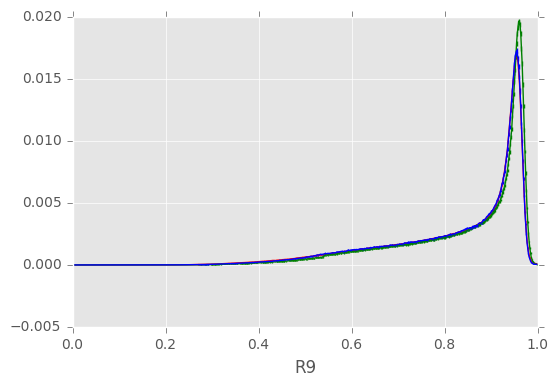

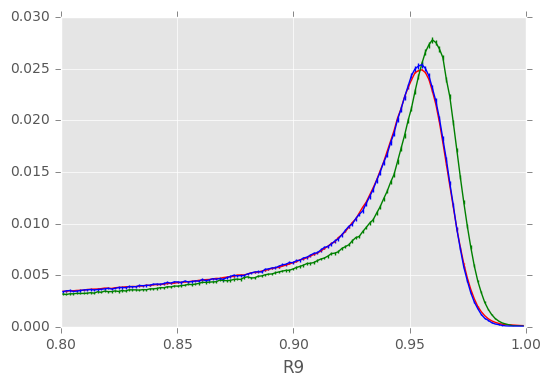

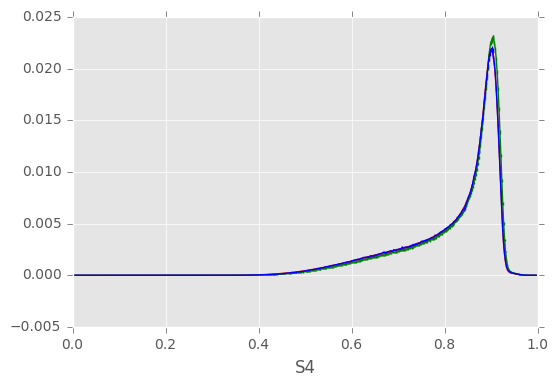

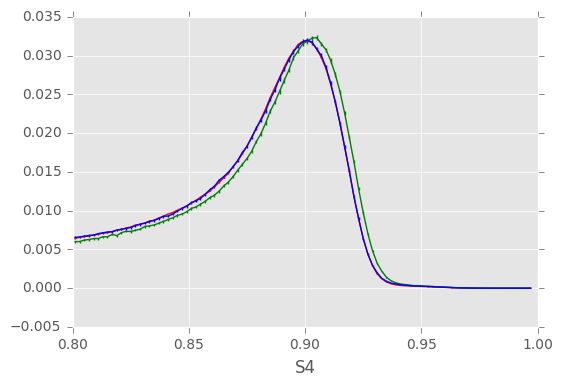

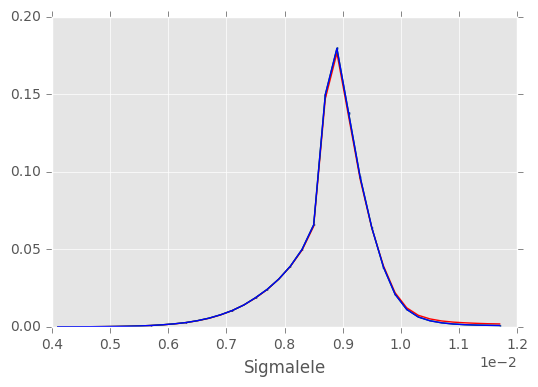

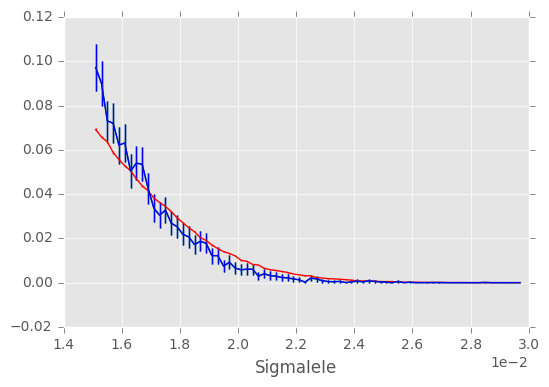

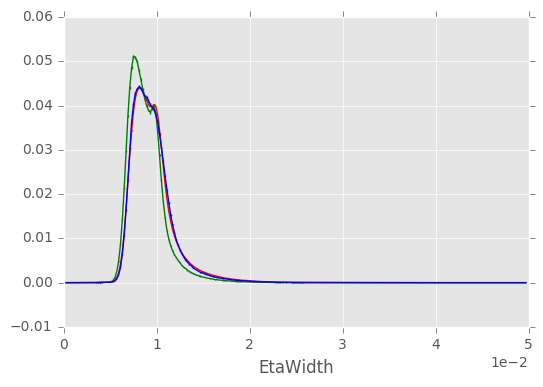

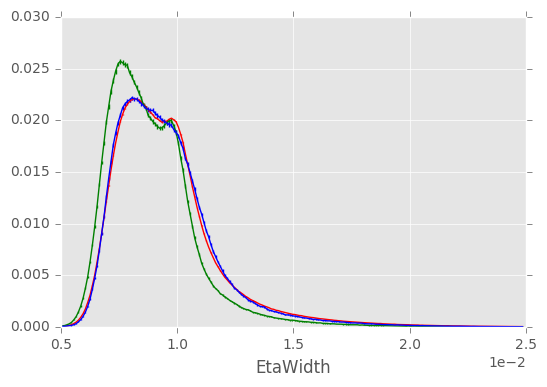

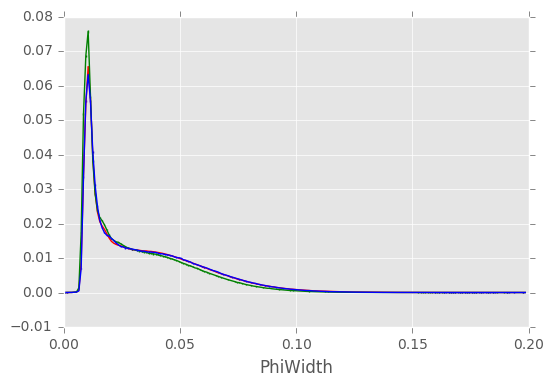

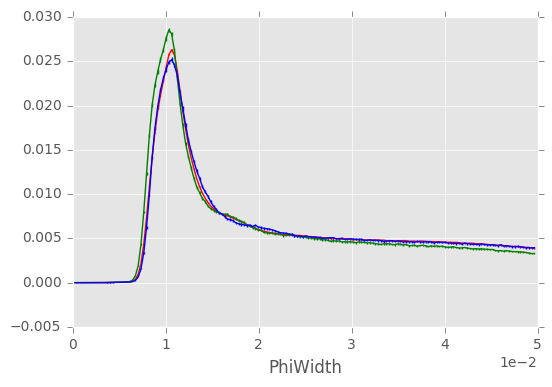

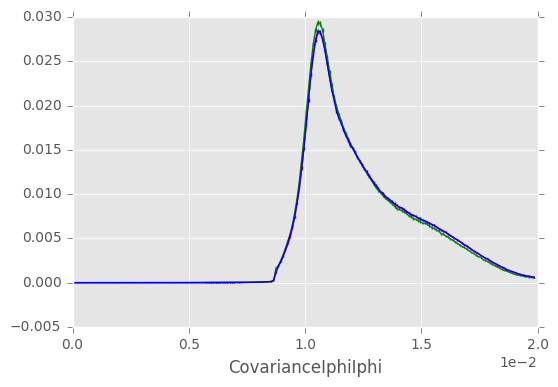

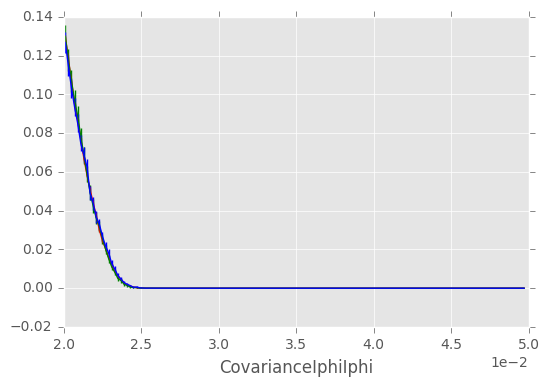

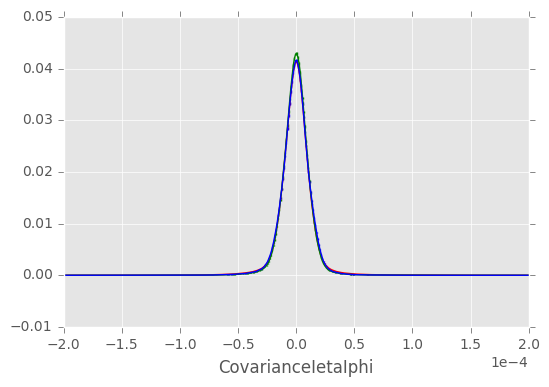

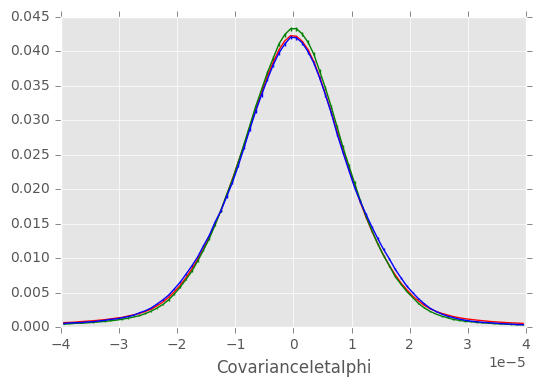

In [22]:
# All periods + integrated + EB
dfm=dfmcEB
dfd=dfdataEB
sec= "EB"
name0="AllPeriods_Integrated_"+sec
section= "section1"
f = open('Plots/'+section+'.tex', "w")
f.write('\part{All Periods Integrated '+sec+"}")
f.close()
print ylist
for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            rv  = np.arange(0.0,1.0,0.0015)
            rv2 = np.arange(0.8,1.0,0.0015)
        else:
            rv  = np.arange(0.0,1.0,0.003)
            rv2 = np.arange(0.8,1.0,0.002)
    if yvar == "S4":
        if sec=="EB":
            rv = np.arange(0.0,1.0,0.002)
            rv2 = np.arange(0.8,1.0,0.002)
        else:
            rv  = np.arange(0.0,1.0,0.003)
            rv2 = np.arange(0.8,1.0,0.002)
    if yvar == "SigmaIeIe":
        if sec=="EB":
            rv = np.arange(0.004,0.012,0.0002)
            rv2 = np.arange(0.015,0.030,0.0002)
        else:
            rv = np.arange(0.014,0.020,0.0002)
            rv2 = np.arange(0.015,0.030,0.0002)
    if yvar == "EtaWidth":
        if sec=="EB":
            rv = np.arange(0.0,0.05,0.0002)
            rv2 = np.arange(0.005,0.025,0.0001)
        else:
            rv = np.arange(0.0,0.05,0.0005)
            rv2 = np.arange(0.005,0.025,0.0002)
    if yvar == "PhiWidth":
        if sec=="EB":
            rv = np.arange(0.0,0.2,0.001)
            rv2 = np.arange(0.0,0.05,0.0003)
        else:
            rv = np.arange(0.0,0.2,0.002)
            rv2 = np.arange(0.0,0.05,0.0006)
    if yvar == "CovarianceIphiIphi":
        if sec=="EB":
            rv  = np.arange(0.0, 0.02,0.0001)
            rv2 = np.arange(0.02, 0.05,0.0002)
        else:
            rv  = np.arange(0.0, 0.02,0.0002)
            rv2 = np.arange(0.02, 0.05,0.0004)
    if yvar == "CovarianceIetaIphi":
        if sec=="EB":
            rv = np.arange(-0.0002, 0.0002,0.000001) 
            rv2 = np.arange(-0.00004, 0.00004,0.000001)
        else:
            rv = np.arange(-0.0002, 0.0002,0.00001) 
            rv2 = np.arange(-0.00004, 0.00004,0.000002)
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    plot.plotHistErr(dfd[yvar], rv, Color="r", Weight=dfd["weight"])
    plot.plotHistErr(dfm[yvar], rv,Weight=dfm["weight"], Color="g")  
    plot.plotHistErr(dfm[yvar+"_corr"], rv,Weight=dfm["weight"], Color="b")
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    name= name0+yvar
    fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
    plot.exportToPdf(name,section)
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    plot.plotHistErr(dfd[yvar], rv2, Color="r", Weight=dfd["weight"])
    plot.plotHistErr(dfm[yvar], rv2,Weight=dfm["weight"], Color="g") 
    plot.plotHistErr(dfm[yvar+"_corr"], rv2,Weight=dfm["weight"], Color="b")
    name= name0+"Zoom"+yvar
    fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
    plot.exportToPdf(name,section)

plotting  R9
plotting  S4
plotting  SigmaIeIe
plotting  EtaWidth
plotting  PhiWidth
plotting  CovarianceIphiIphi
plotting  CovarianceIetaIphi


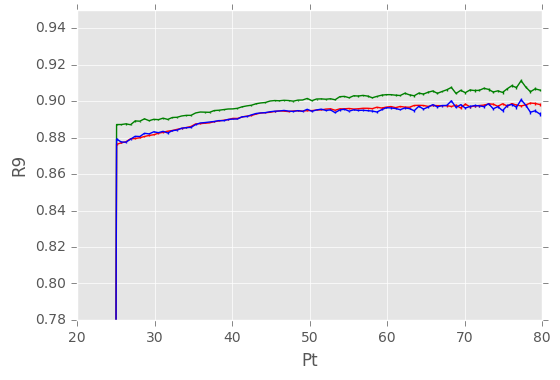

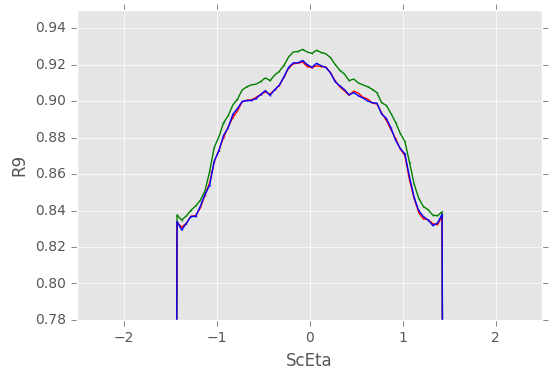

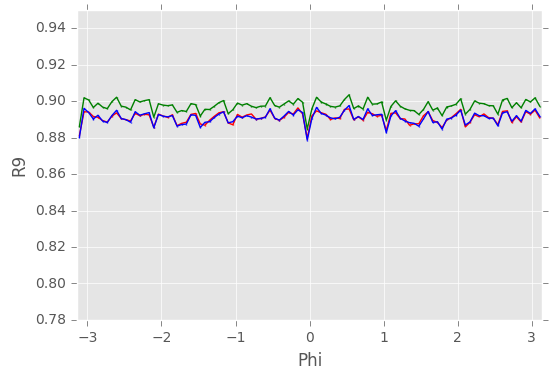

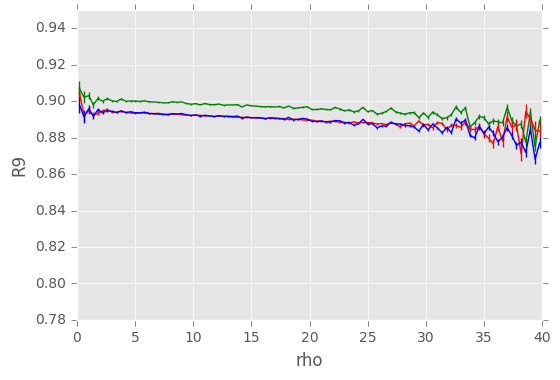

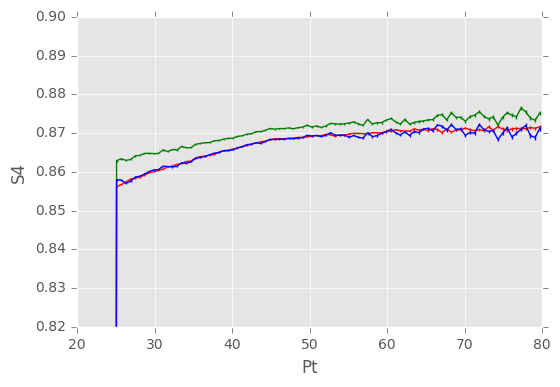

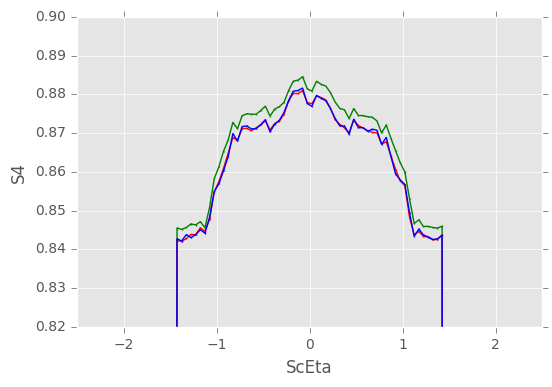

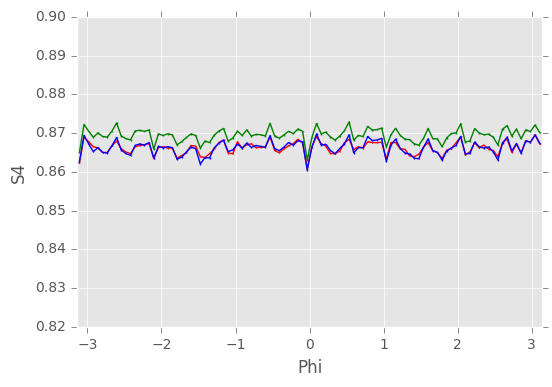

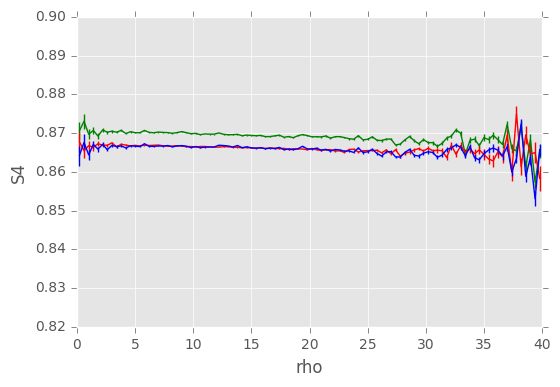

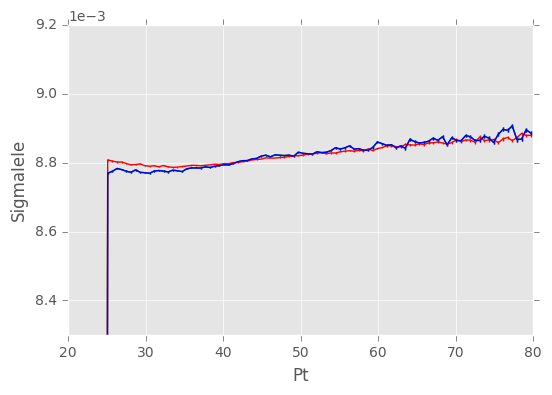

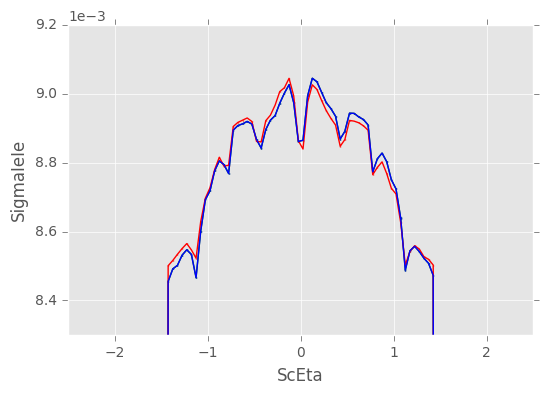

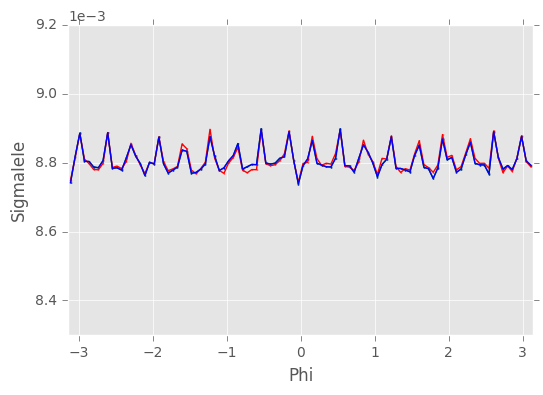

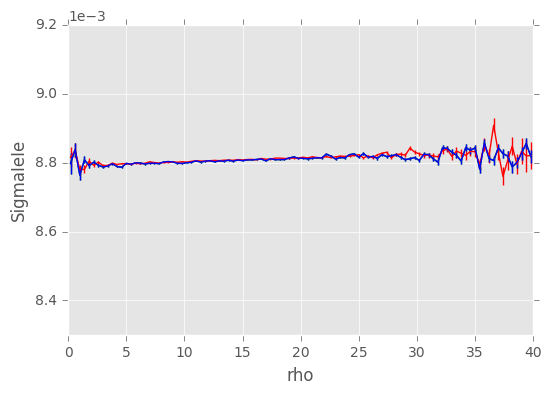

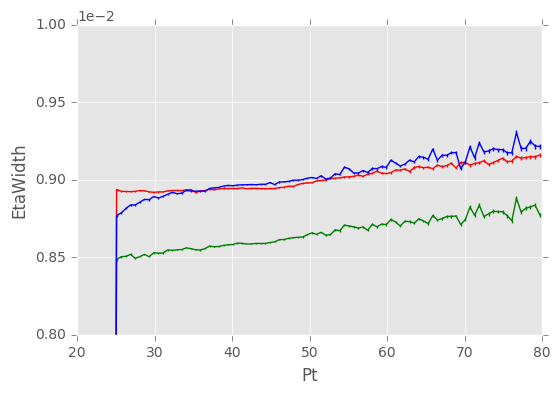

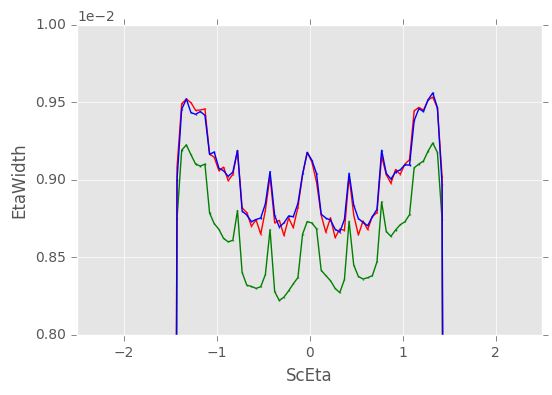

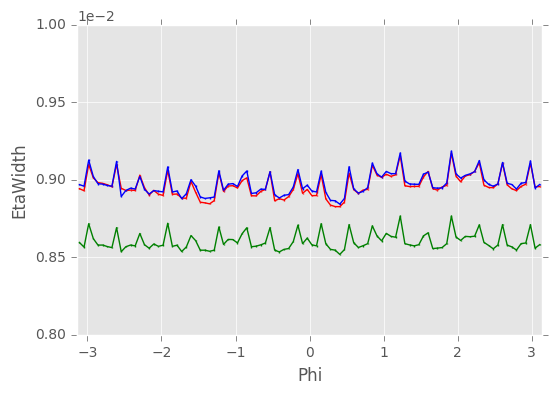

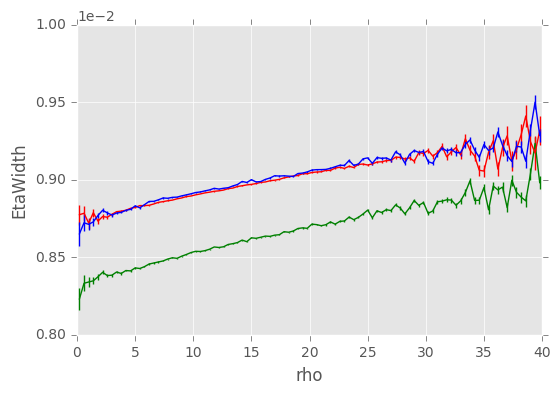

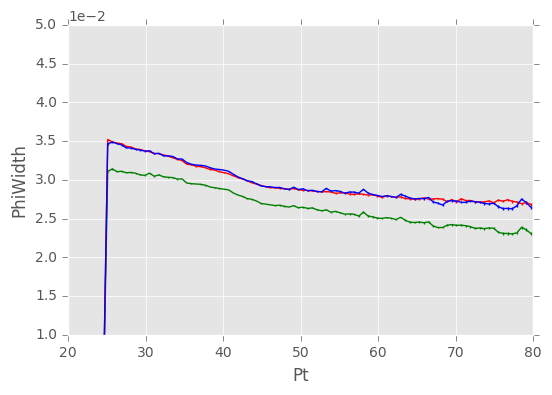

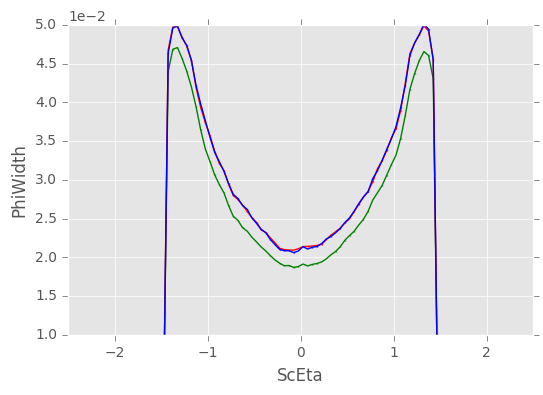

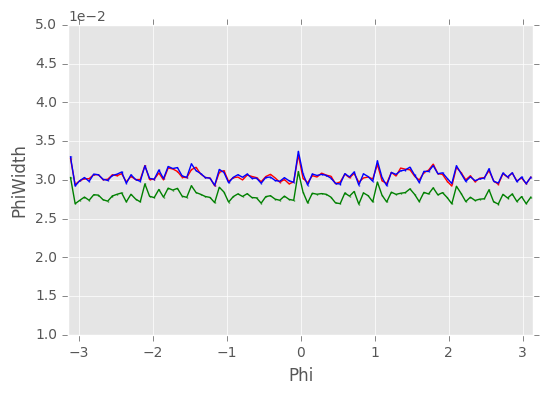

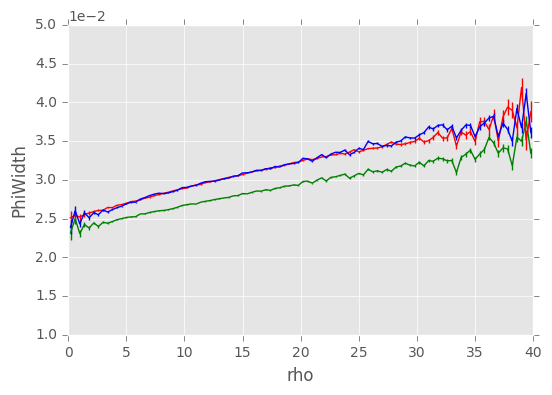

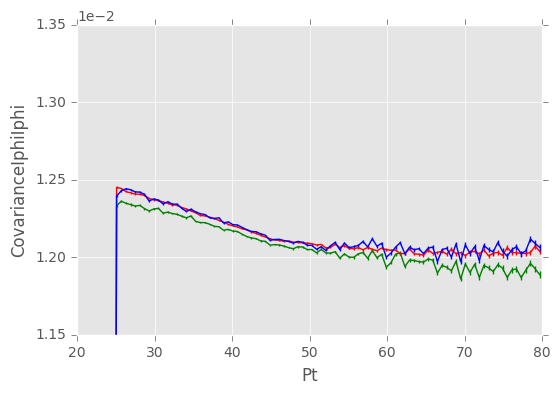

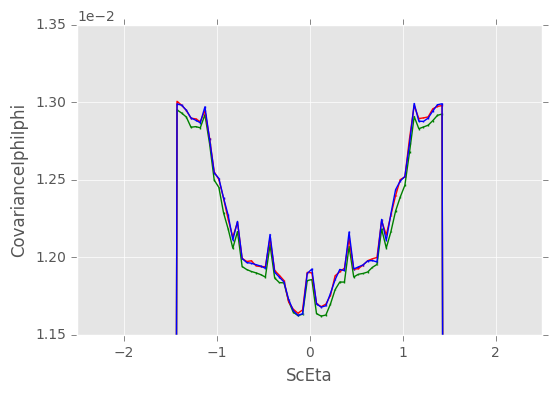

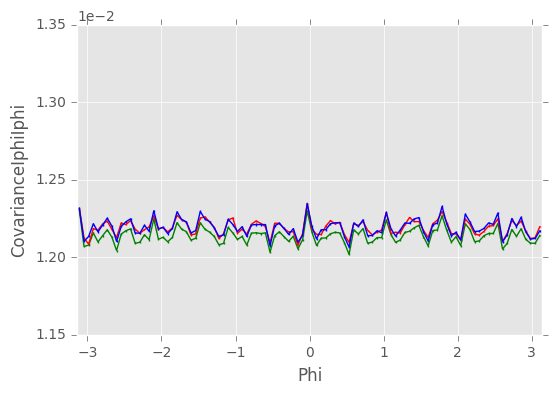

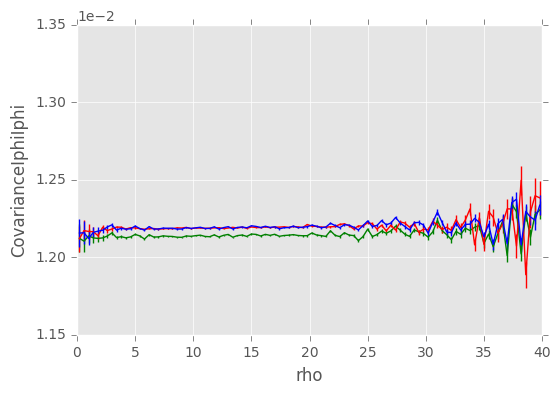

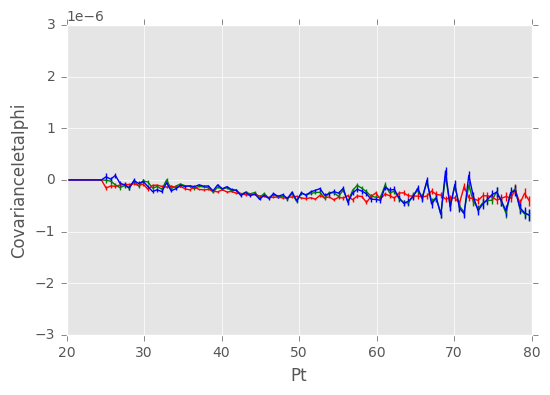

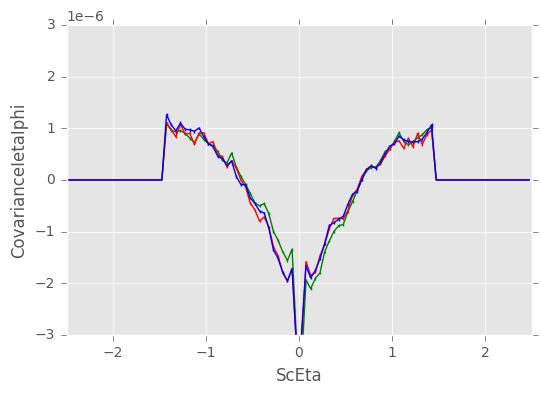

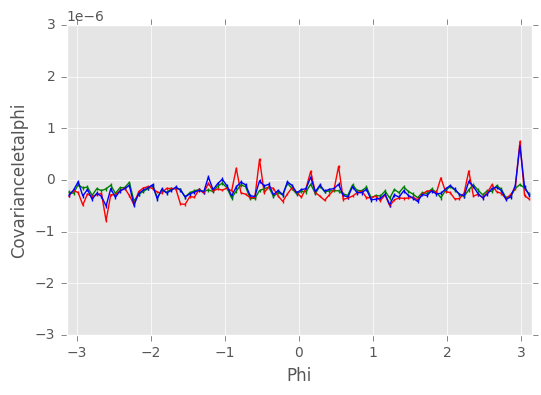

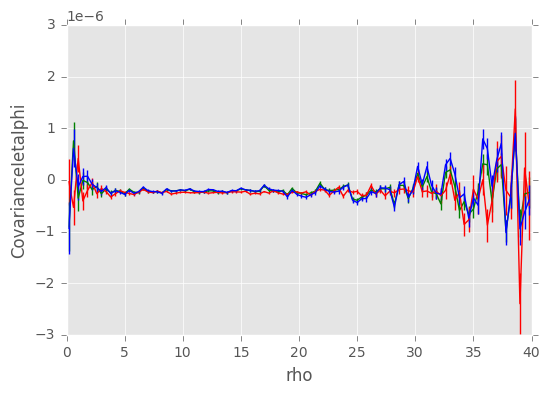

In [28]:
# split profiles in EB/EE (profile meaningless when the values of the variable are very different in the two cases)
dfm=dfmcEB
dfd=dfdataEB
sec= "EB"
name0="AllPeriods_Profiles_"+sec
section= "section3"
f = open('Plots/'+section+'.tex', "w")
f.write('\part{All Periods Profiles '+sec+"}")
f.close()

for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
        else: 
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
    if yvar == "S4":
        if sec=="EB":
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
        else: 
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
    if yvar == "SigmaIeIe":
        if sec=="EB":
            minY, maxY = 0.007, 0.01
            ymin,ymax=0.0083,0.0092
        else: 
            minY, maxY = 0.022, 0.028
            ymin,ymax=0.023,0.026
    if yvar == "EtaWidth":
        if sec=="EB":
            minY, maxY = 0.006, 0.012
            ymin,ymax=0.008,0.01
        else: 
            minY, maxY = 0.005, 0.030
            ymin,ymax=0.005,0.03
    if yvar == "PhiWidth":
        if sec=="EB": 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.01,0.05
        else: 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.025,0.05
    if yvar == "CovarianceIphiIphi":
        if sec=="EB":
            minY, maxY = 0.010, 0.016
            ymin,ymax=0.0115,0.0135
        else: 
            minY, maxY = 0.02, 0.040
            ymin,ymax=0.028,0.036
    if yvar == "CovarianceIetaIphi":
        if sec=="EB":
            minY, maxY = -0.00003, 0.00003
            ymin,ymax=-0.000003,0.000003
        else: 
            minY, maxY = -0.0002, 0.0002
            ymin,ymax=-0.00003,0.00003
    for xvar in X:
        if xvar=="ScEta":
            xmin,xmax= -2.5,2.5
        if xvar=="Pt":
            xmin,xmax=20.0,80.0
        if xvar=='rho':
            xmin,xmax=0.,40.
        if xvar=="Phi":
            xmin,xmax=-3.14,3.14
            
        fig = plt.figure(dpi=400)
        ax = fig.add_subplot(111)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        ax.set_xlabel(xvar)
        ax.set_ylabel(yvar)
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(ymin,ymax)
        plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
        plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
        plot.Profile(dfm[xvar]  , dfm[yvar+'_corr']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        name= name0+yvar+"vs"+xvar
        fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
        plot.exportToPdf(name,section)

plotting  R9
plotting  S4
plotting  SigmaIeIe
plotting  EtaWidth
plotting  PhiWidth
plotting  CovarianceIphiIphi
plotting  CovarianceIetaIphi


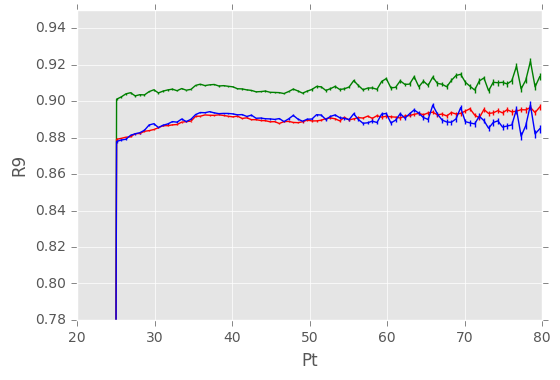

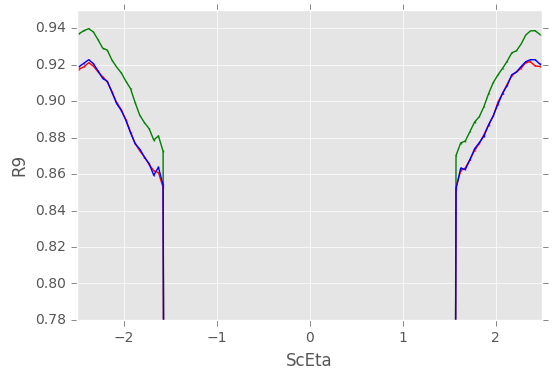

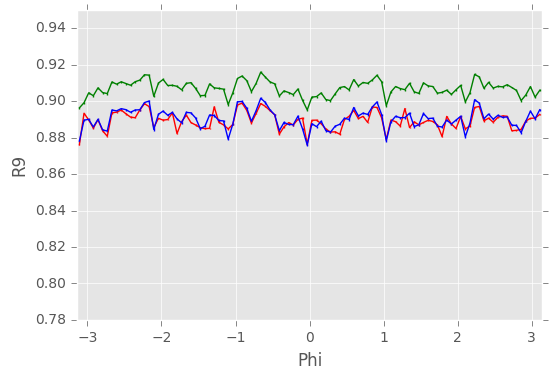

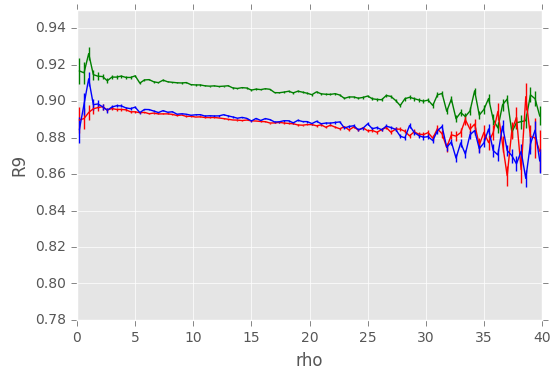

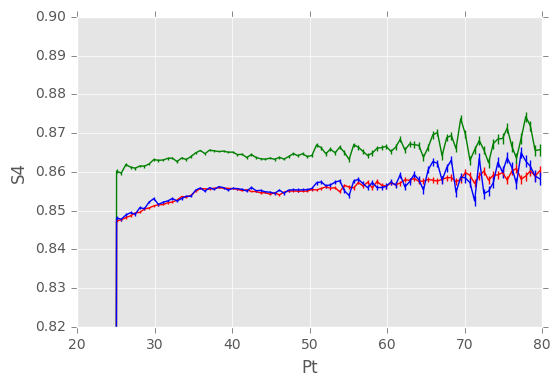

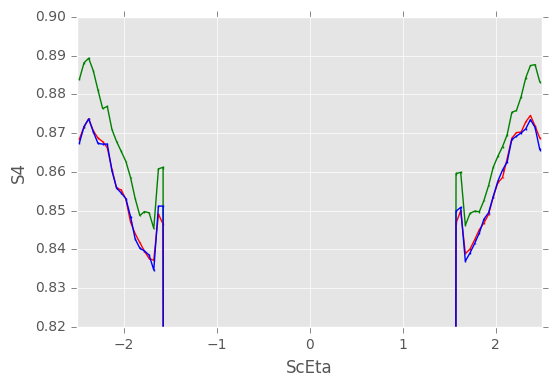

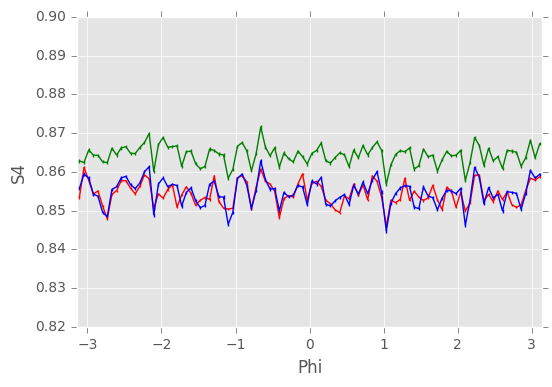

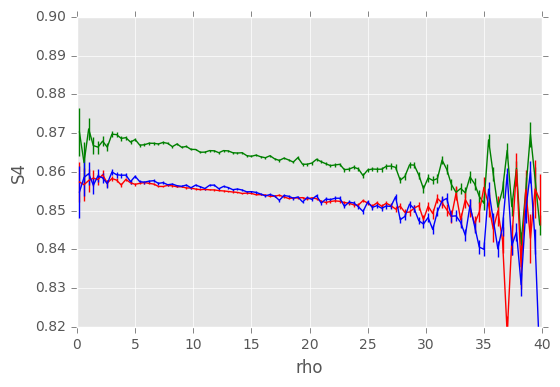

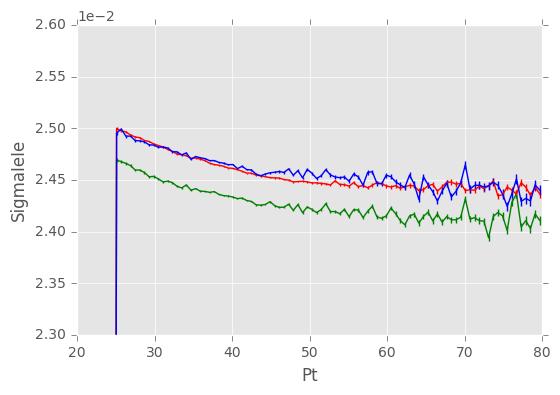

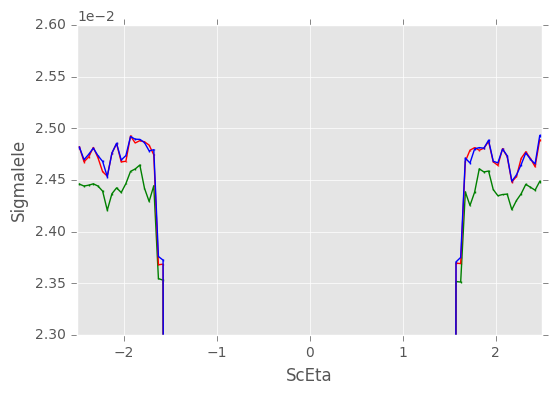

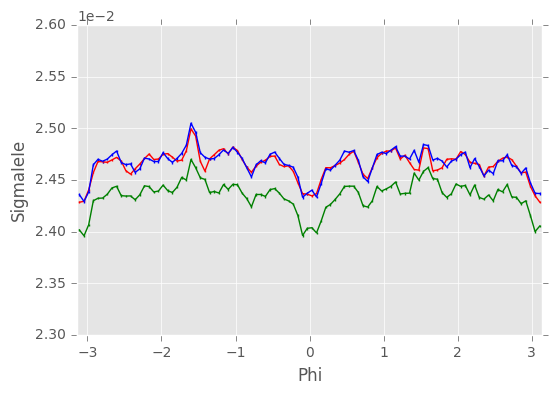

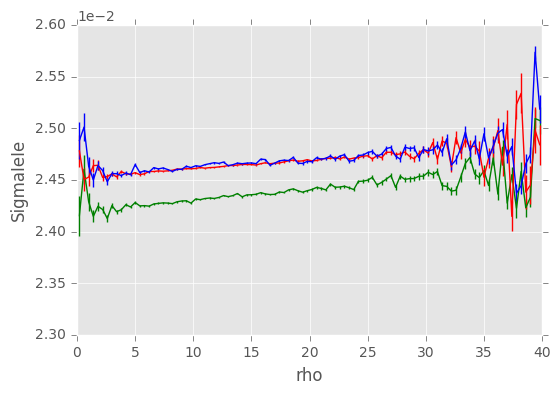

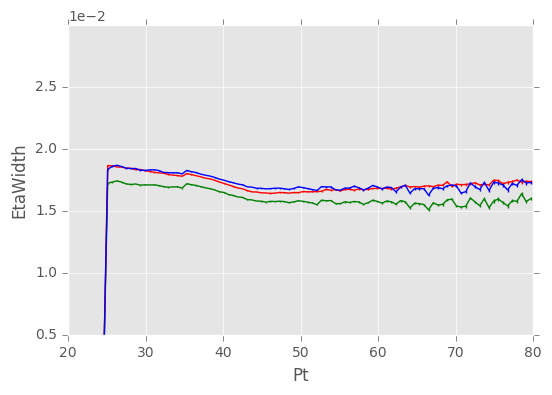

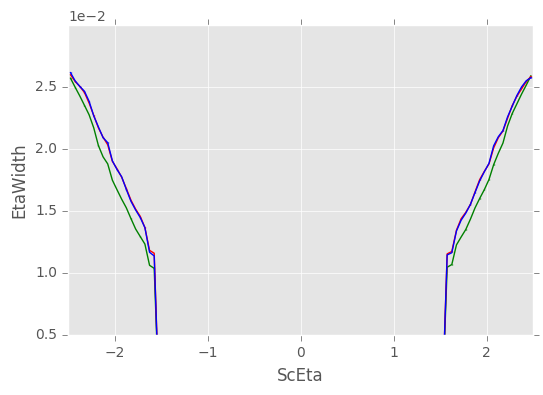

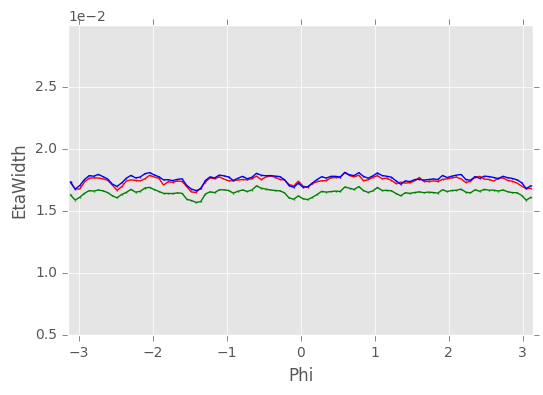

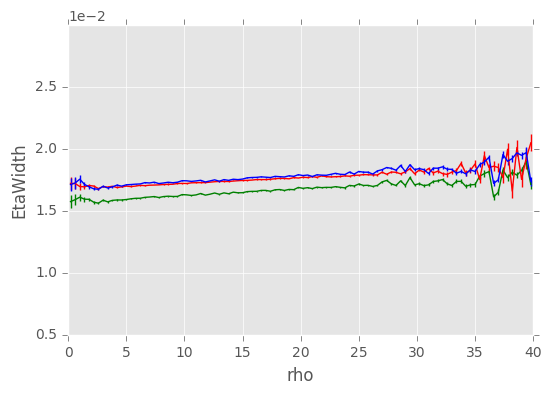

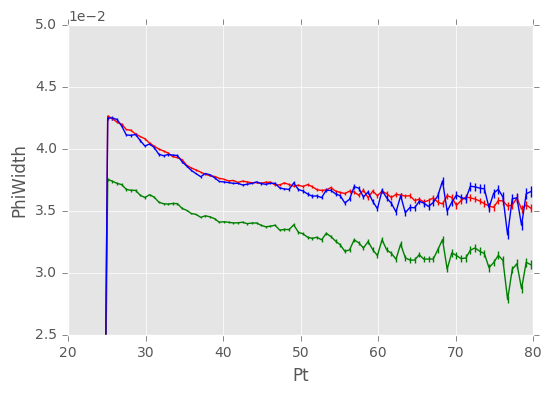

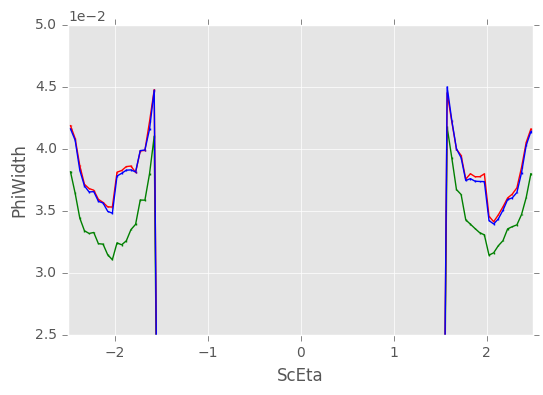

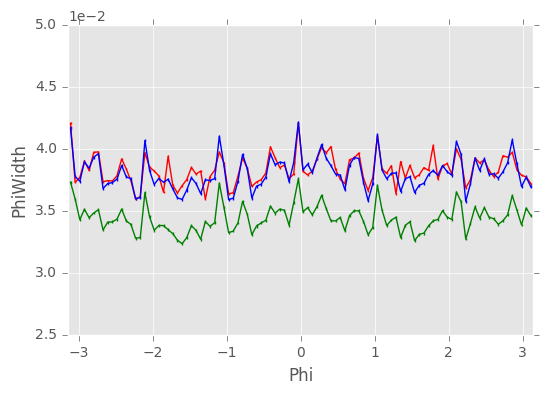

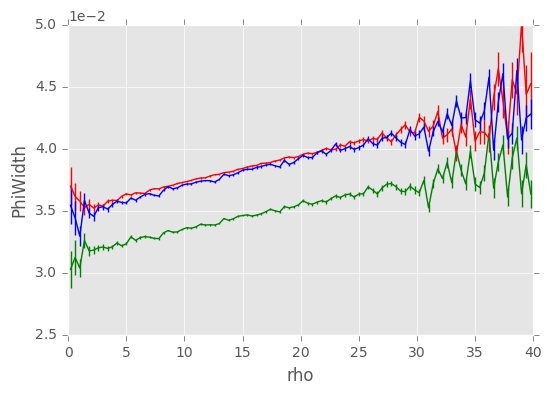

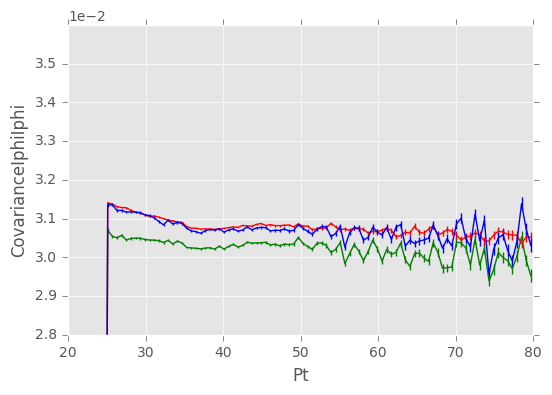

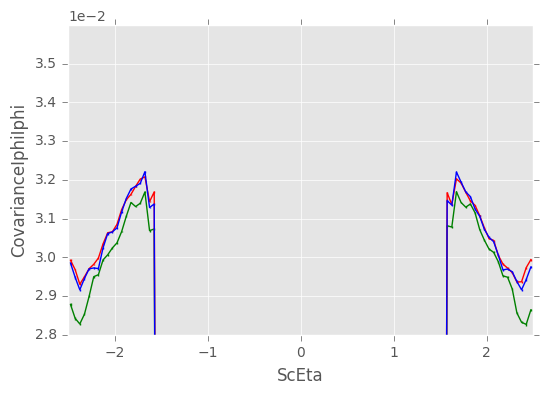

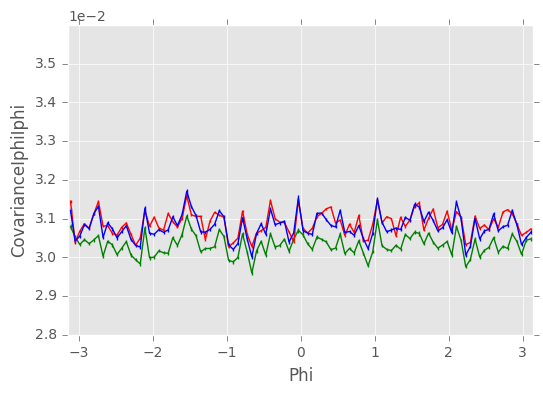

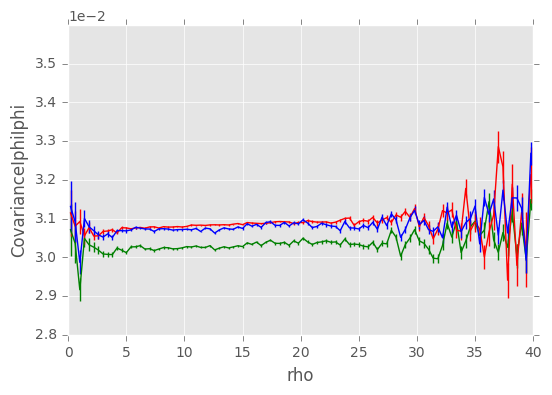

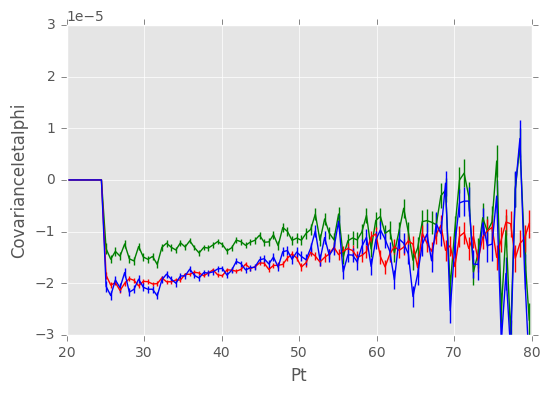

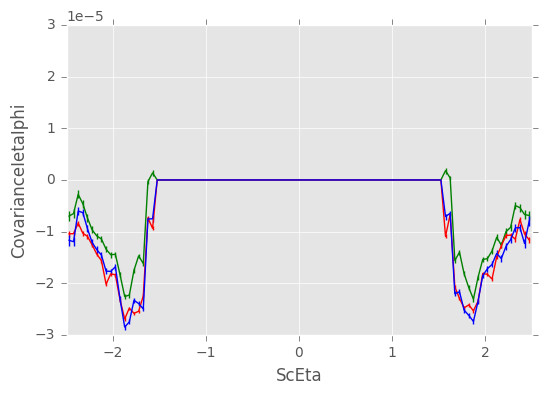

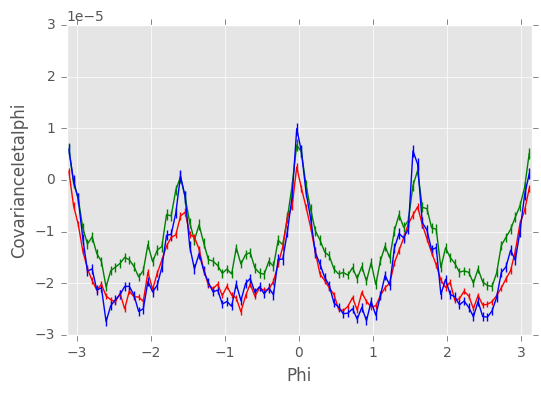

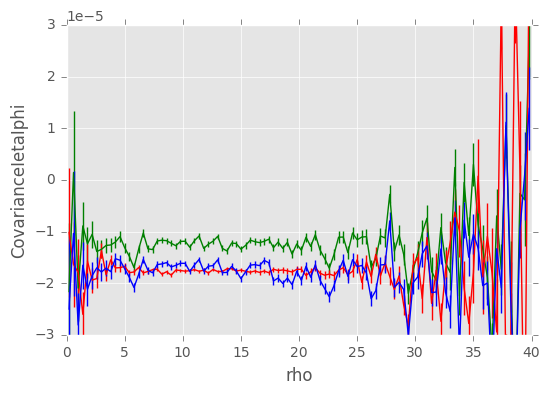

In [29]:
# split profiles in EB/EE (profile meaningless when the values of the variable are very different in the two cases)
dfm=dfmcEE
dfd=dfdataEE
sec= "EE"
name0="AllPeriods_Profiles_"+sec
section= "section4"
f = open('Plots/'+section+'.tex', "w")
f.write('\part{All Periods Profiles '+sec+"}")
f.close()

for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
        else: 
            minY, maxY = 0.7, 1.0
            ymin,ymax=0.78,0.95
    if yvar == "S4":
        if sec=="EB":
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
        else: 
            minY, maxY = 0.75, 0.95
            ymin,ymax=0.82,0.90
    if yvar == "SigmaIeIe":
        if sec=="EB":
            minY, maxY = 0.007, 0.01
            ymin,ymax=0.0083,0.0092
        else: 
            minY, maxY = 0.022, 0.028
            ymin,ymax=0.023,0.026
    if yvar == "EtaWidth":
        if sec=="EB":
            minY, maxY = 0.006, 0.012
            ymin,ymax=0.008,0.01
        else: 
            minY, maxY = 0.005, 0.030
            ymin,ymax=0.005,0.03
    if yvar == "PhiWidth":
        if sec=="EB": 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.01,0.05
        else: 
            minY, maxY = 0.001, 0.08
            ymin,ymax=0.025,0.05
    if yvar == "CovarianceIphiIphi":
        if sec=="EB":
            minY, maxY = 0.010, 0.016
            ymin,ymax=0.0115,0.0135
        else: 
            minY, maxY = 0.02, 0.040
            ymin,ymax=0.028,0.036
    if yvar == "CovarianceIetaIphi":
        if sec=="EB":
            minY, maxY = -0.00003, 0.00003
            ymin,ymax=-0.000003,0.000003
        else: 
            minY, maxY = -0.0002, 0.0002
            ymin,ymax=-0.00003,0.00003
    for xvar in X:
        if xvar=="ScEta":
            xmin,xmax= -2.5,2.5
        if xvar=="Pt":
            xmin,xmax=20.0,80.0
        if xvar=='rho':
            xmin,xmax=0.,40.
        if xvar=="Phi":
            xmin,xmax=-3.14,3.14
            
        fig = plt.figure(dpi=400)
        ax = fig.add_subplot(111)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        ax.set_xlabel(xvar)
        ax.set_ylabel(yvar)
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(ymin,ymax)
        plot.Profile(dfm[xvar]  , dfm[yvar]        ,100,xmin,xmax,minY,maxY,ax,'green',dfm["weight"])
        plot.Profile(dfd[xvar]  , dfd[yvar]        ,100,xmin,xmax,minY,maxY,ax,'red',dfd["weight"])
        plot.Profile(dfm[xvar]  , dfm[yvar+'_corr']        ,100,xmin,xmax,minY,maxY,ax,'blue',dfm["weight"])
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        name= name0+yvar+"vs"+xvar
        fig.savefig('Plots/'+name+'.png', dpi=fig.dpi)
        plot.exportToPdf(name,section)